In [16]:
import pandas as pd
import numpy as np
import datetime
from pandas import Series
from datetime import datetime
import datetime
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [24]:
# link do wybranej stacji 
txt = r'https://meteomodel.pl/dane/historyczne-dane-pomiarowe/?data={}&rodzaj=st&imgwid=254180090&dni=32&ord=desc'
df_lista=[]

# ramy czasowe
start_month_number = 1
end_month_number = 13
rok_poczatkowy = 2018
rok_koncowy = 2019

for year in range(rok_poczatkowy, rok_koncowy):
        for month in range(start_month_number, end_month_number):
            l = []
            this_month = datetime.date.today().replace(year=year, month=month, day=1)
            
            data = this_month.strftime("%Y-%m-%d")
            
            link = txt.format(data)
            r = requests.get(link)

            # Extracts the response as html: html_doc
            html_doc = r.text

            # Create a BeautifulSoup object from the HTML: soup
            soup = BeautifulSoup(html_doc)

            # Prettify the BeautifulSoup object: pretty_soup
            table = soup.find('table')
            table_rows = table.find_all('tr')

            for tr in table_rows:
                td = tr.find_all('td')
                row = [tr.text for tr in td]

                l.append(row)
            df = pd.DataFrame(columns=["data", "temp_średnia", "temp_max", "temp_min", "tng", "wilg_rh", "wil_va", 
                                           "chmurka", "v_wiatru", "v1", "v2", "cisn_mslp", "cisn_ppp", 
                                       "suma_opadu", "opady_x", "opady_y", "snieg_cm",  "snieg_mm",
                                              "1", "2", "3", "4", "5", "6", "7", "8"], data = l)   

            df = df.iloc[2:]
            df_lista.append(df)

In [25]:
# polaczenie listy df, remove duplicates i index na date
df_polaczone = pd.concat(df_lista)
df_polaczone = df_polaczone.drop_duplicates(['data'], keep='first')
df_polaczone['data'] = pd.to_datetime(df_polaczone['data'], format ='%Y-%m-%d')

df_polaczone.set_index('data', inplace = True)

lista_float = ["temp_średnia", "temp_max", "temp_min", "suma_opadu" ]

df_polaczone[lista_float] = df_polaczone[lista_float].astype('float64')

display(df_polaczone.head())
df_polaczone.to_csv('1970_2019.csv')

,temp_średnia,temp_max,temp_min,tng,wilg_rh,wil_va,chmurka,v_wiatru,v1,v2,...,snieg_cm,snieg_mm,1,2,3,4,5,6,7,8
data,,,,,,,,,,,,,,,,,,,,,
2018-01-01,5.9,9.0,2.3,-,-,-,6.7,4.7,-,-,...,-,-,-,-,-,-,-,-,-,-
2017-12-31,1.4,2.8,-1.3,-,-,-,8.0,5.3,-,-,...,3,-,-,-,-,-,-,-,-,-
2017-12-30,-0.8,2.0,-2.2,-,-,-,3.3,4.7,-,-,...,-,-,-,-,-,-,-,-,-,-
2017-12-29,1.5,3.3,0.2,-,-,-,7.3,3.7,-,-,...,-,-,-,-,-,-,-,-,-,-
2017-12-28,2.5,4.3,0.1,-,-,-,7.7,2.0,-,-,...,-,-,-,-,-,-,-,-,-,-


In [26]:
df_weekly = df_polaczone.resample('W').mean()

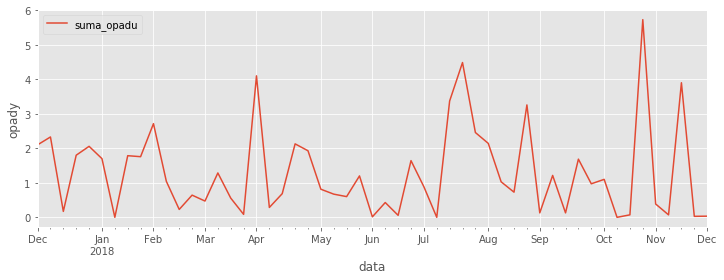

In [27]:
# wykres temperatury
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
df_weekly.suma_opadu.plot(ax = ax)
plt.ylabel('opady', fontdict=None, labelpad=None)
ax.legend()

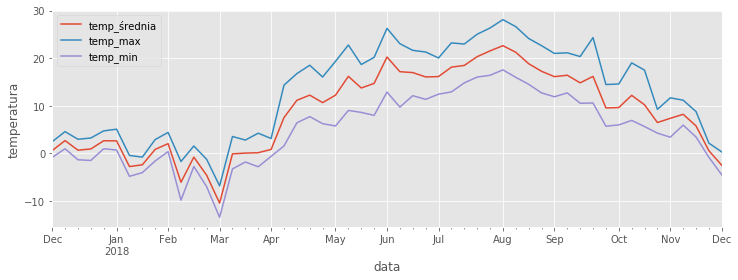

In [28]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
df_weekly.temp_średnia.plot(ax = ax)
df_weekly.temp_max.plot(ax = ax)
df_weekly.temp_min.plot(ax = ax)
plt.ylabel('temperatura', fontdict=None, labelpad=None)
ax.legend()